In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\Home\Desktop\eggs.csv')
data = data.drop(columns = ['Code'])
data.columns

Index(['Entity', 'Year', 'Egg supply per person (kilograms per year)'], dtype='object')

In [3]:
countries = pd.get_dummies(data['Entity']).columns

In [4]:
country_data = []
for country in countries:
    df = data[data['Entity'] == country].drop(columns = ['Entity'])
    country_data.append([country, df])

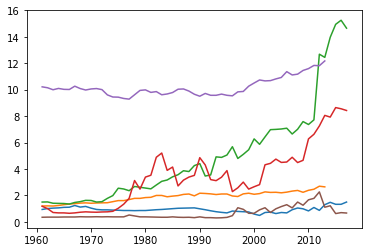

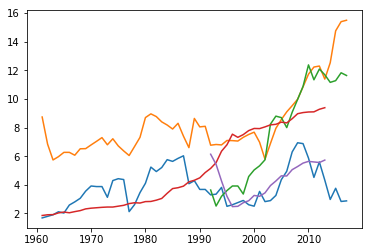

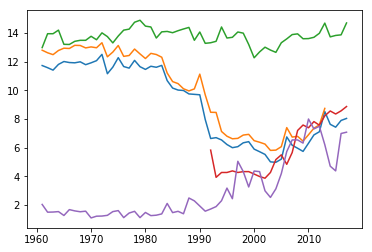

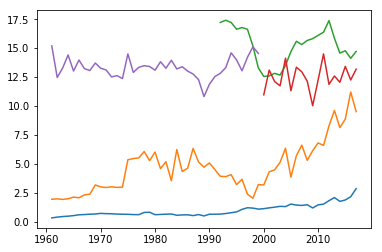

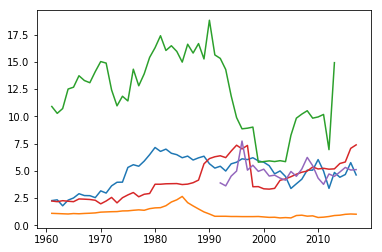

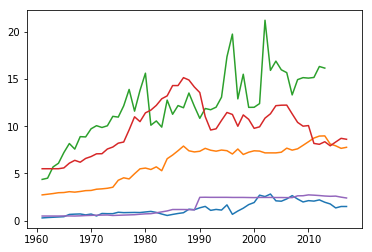

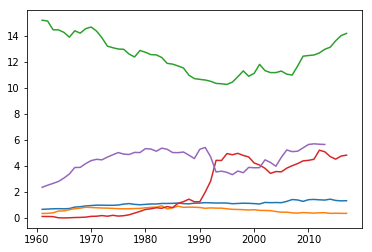

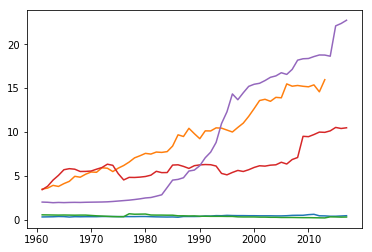

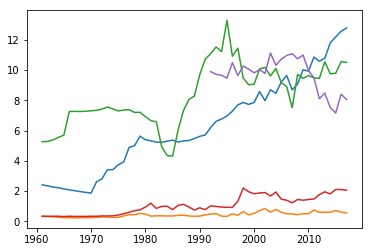

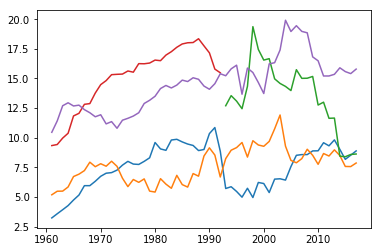

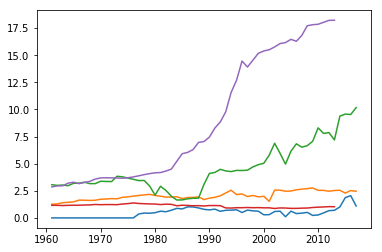

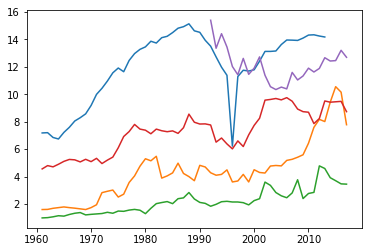

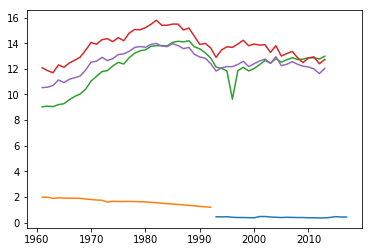

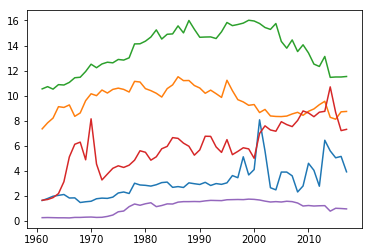

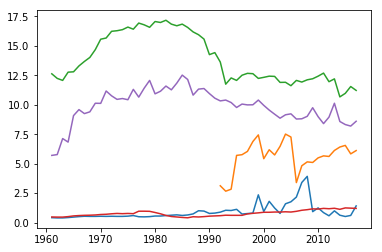

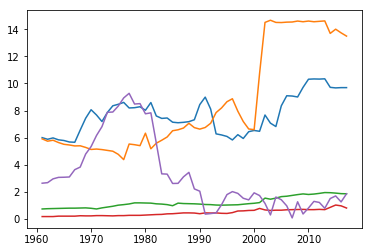

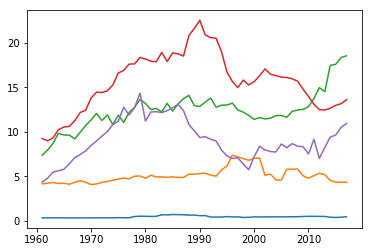

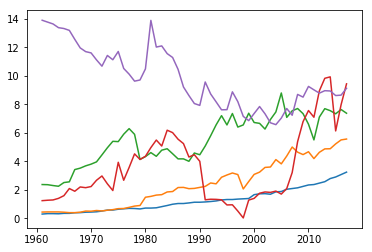

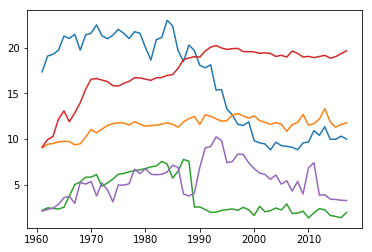

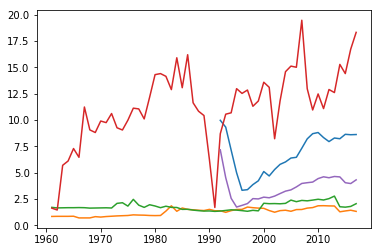

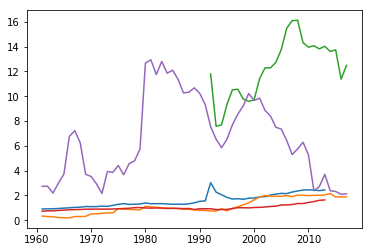

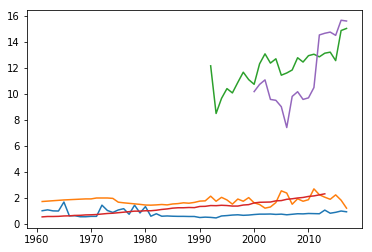

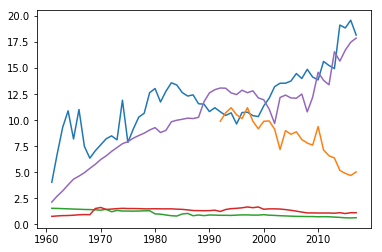

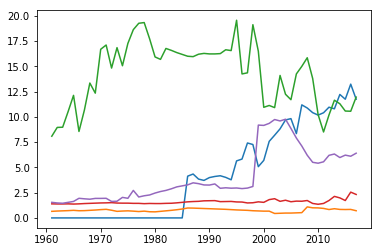

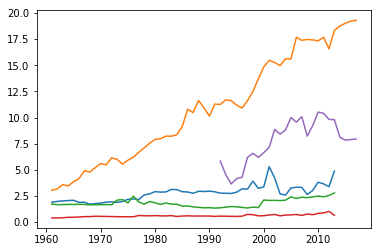

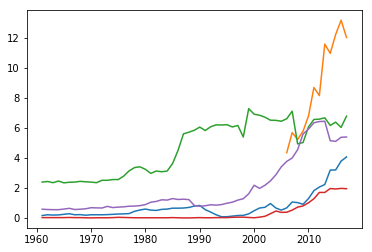

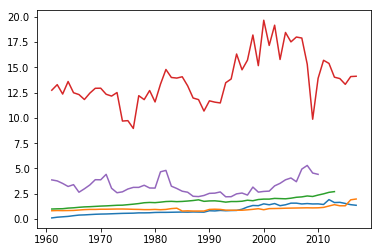

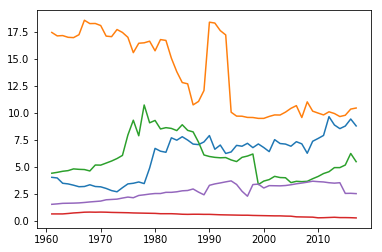

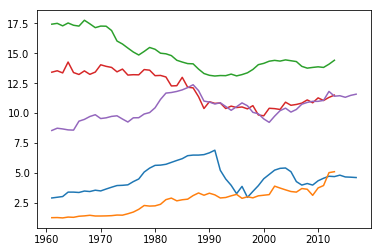

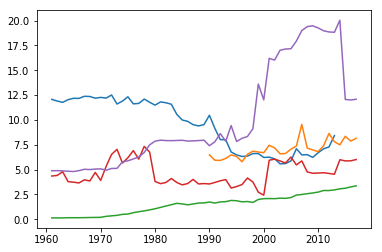

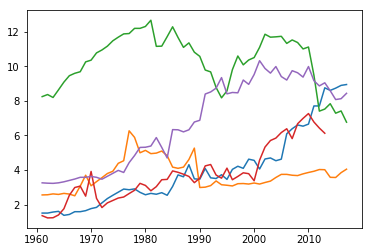

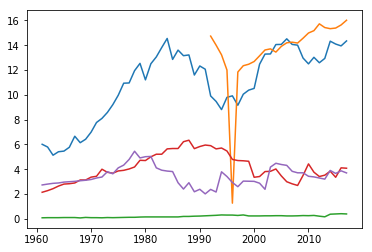

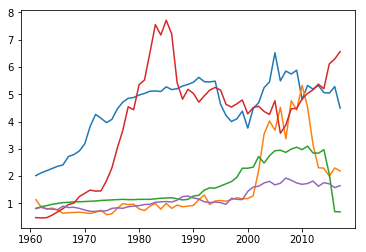

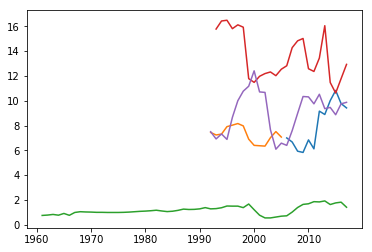

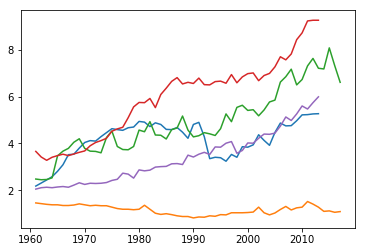

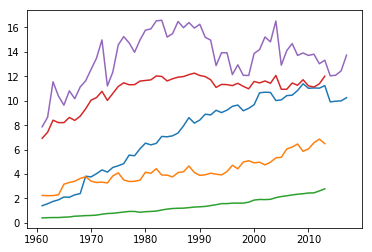

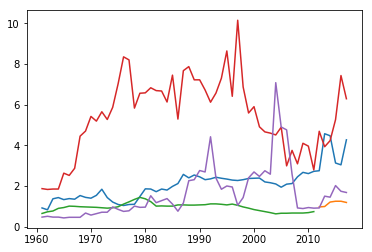

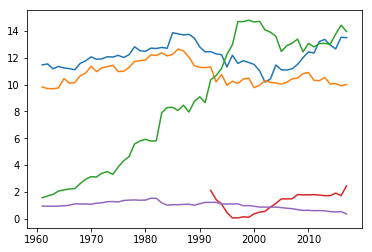

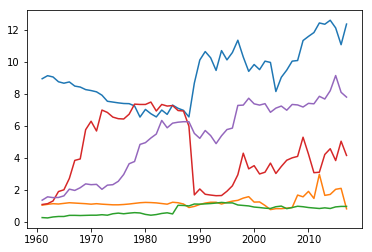

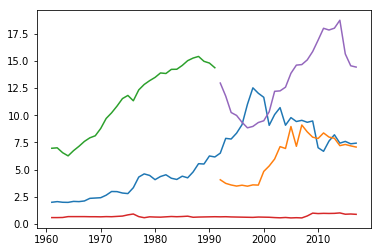

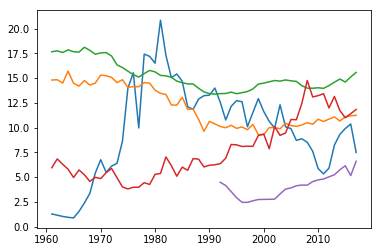

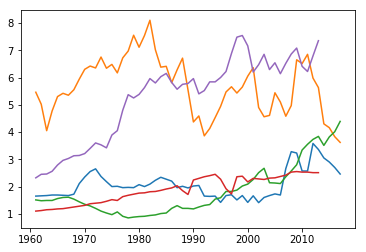

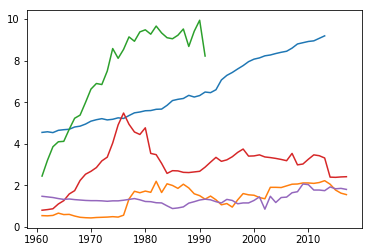

In [5]:
for i in range(len(country_data)): 
    afg = country_data[i]
    x = afg[1]['Year']
    y = afg[1]['Egg supply per person (kilograms per year)']
    plt.plot(x,y)
    if (i%5 == 0) and i != 0:
        plt.show()

In [128]:
X_train, y_train = [], []
country = country_data[0]
country_len = len(country[1])
x = list(country[1]['Year'])
y = list(country[1]['Egg supply per person (kilograms per year)'])

for i in range(10, country_len):
    X_train.append(y[i-10:i])
    y_train.append(y[i])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [129]:
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation, LSTM, Dropout

In [130]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100))
model.add(Dense(units=1))

In [131]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [132]:
model.fit(X_train, y_train, epochs = 50, batch_size = 128)

Epoch 1/50
47/47 [==============================] - 3s 54ms/step - loss: 0.8814
Epoch 2/50
47/47 [==============================] - 0s 2ms/step - loss: 0.7936
Epoch 3/50
47/47 [==============================] - 0s 2ms/step - loss: 0.6974
Epoch 4/50
47/47 [==============================] - 0s 2ms/step - loss: 0.5764
Epoch 5/50
47/47 [==============================] - 0s 2ms/step - loss: 0.4215
Epoch 6/50
47/47 [==============================] - 0s 2ms/step - loss: 0.2383
Epoch 7/50
47/47 [==============================] - 0s 1ms/step - loss: 0.0776
Epoch 8/50
47/47 [==============================] - 0s 2ms/step - loss: 0.1207
Epoch 9/50
47/47 [==============================] - 0s 2ms/step - loss: 0.2330
Epoch 10/50
47/47 [==============================] - 0s 2ms/step - loss: 0.1509
Epoch 11/50
47/47 [==============================] - 0s 2ms/step - loss: 0.0687
Epoch 12/50
47/47 [==============================] - 0s 2ms/step - loss: 0.0522
Epoch 13/50
47/47 [=============================

In [136]:
values = np.asarray(y)

def predict_data(model, vals):
    val = vals
    X_test = np.asarray(values[-10:])
    X_test = np.reshape(X_test, (1, X_test.shape[0], 1))
    output = model.predict(X_test)
    val = np.append(val, output[0][0])
    return val, output

In [137]:
for i in range(20):
    values, output = predict_data(model, values)

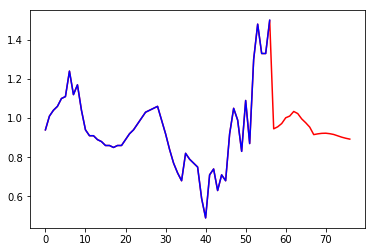

In [138]:
plt.plot(values, color = 'red')
plt.plot(y, color = 'blue')